Koostööd sai tehtud grupis järgnevate inimestega: Oskar Pihlak ja Karl Viik

# Pideva muutuja ennustamine

## Sisukord

* [Visualiseerimine teegiga Seaborn](#visu)
* [Ülesanne 10.1](#10_1)
* [Korrelatsioonimaatriks](#kor)
* [Lineaarregressioon](#lin)
* [Polünomiaalregressioon](#poly)
* [Otsustuspuu regressioon](#puu)
* [Ülesanne 10.2](#10_2)

Põhineb S.Raschka *Python Machine Learnig* raamatu 
[peatükil 10](https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch10) ([*MIT litsents*](https://github.com/rasbt/python-machine-learning-book/blob/master/LICENSE.txt)).

<a id='visu'></a>

## Visualiseerimine teegiga *Seaborn*

Teek [seaborn](https://seaborn.pydata.org/) pakub matplotlib teegi peale ehitatud lisavõimalusi andmete visualiseerimiseks.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
boston_h = load_boston()
X = pd.DataFrame(boston_h.data, columns=boston_h.feature_names)
y = boston_h.target
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
print(boston_h.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM']
df_simple = X[cols].assign(MEDV=y)
df_simple.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


Teek *Seaborn* pakub funktsioone küllaltki keerukate diagrammide lihtsaks koostamiseks. Selle diagrammitüüp `pairplot` võimaldab kirjeldada $n$ atribuudi paaritisi seoseid $n \times n$ väikese hajusgraafikuga (*scatterplot*), mis on paigutatud tabelisse. Tabeli lahtris rea*i* ja veeru *j* asub atribuutide *i* ja *j* seost kirjeldav hajusgraafik. Erandiks on peadiagonaal, sest atribuudi hajusgraafik iseendaga on alati sirge , mis uut informatsiooni ei anna. Peadiagonaalil on iga atribuudi väärtuste jaotust kirjeldavad histogrammid. Selline graafik vastab E. Tufte kirjeldatud väikeste korduste (*small multiples*) andmevisualiseerimise mustrile.

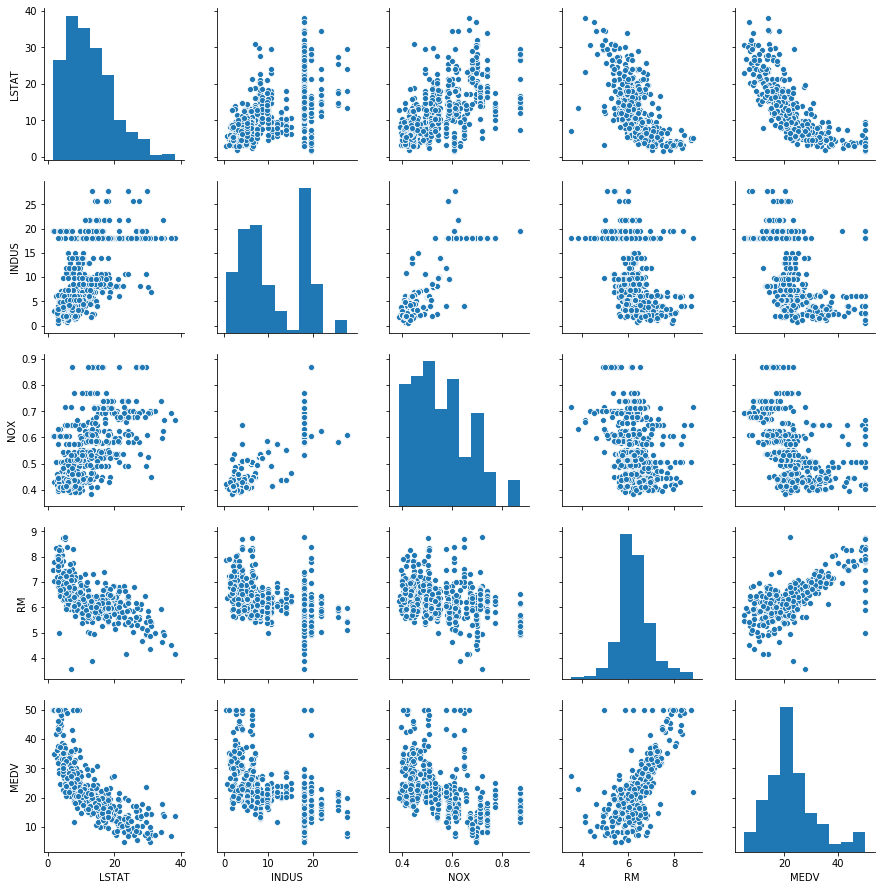

In [5]:
sns.pairplot(df_simple)
plt.show()

<a id='10_1'></a>

## Ülesanne 10.1


Joonistada *Seaborn pairplot* graafikud Iiriste andmestiku jaoks ( [sklearn.datasets.load_iris()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)).

Milliste atribuutide vahel paistab olevat tugevaim korrelatsioon?
Millised atribuudid paistavad vastavat kõige paremini normaaljaotusele?

Koostada *Seaborn pairplot* graafikud ka veinide andmestiku jaoks  ([sklearn.datasets.load_wine()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)). Kuivõrd loetav on selline $13 \times 13$ graafikute tabel? Kummas andmestikus (iirised või veinid) on korrelatsioonid atribuutide vahel tugevamad?

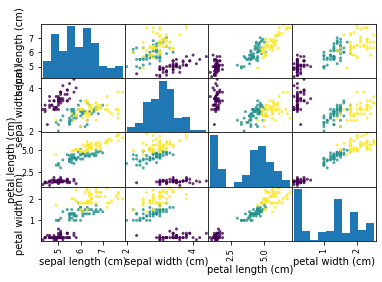

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import datasets

iris_dataset = datasets.load_iris()

iris_dataframe = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=iris_dataset.target, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)

Suurim korrelatsioon on petal length ja petal width vahel
Kõige paremini vastab normaaljaotusele sepal width

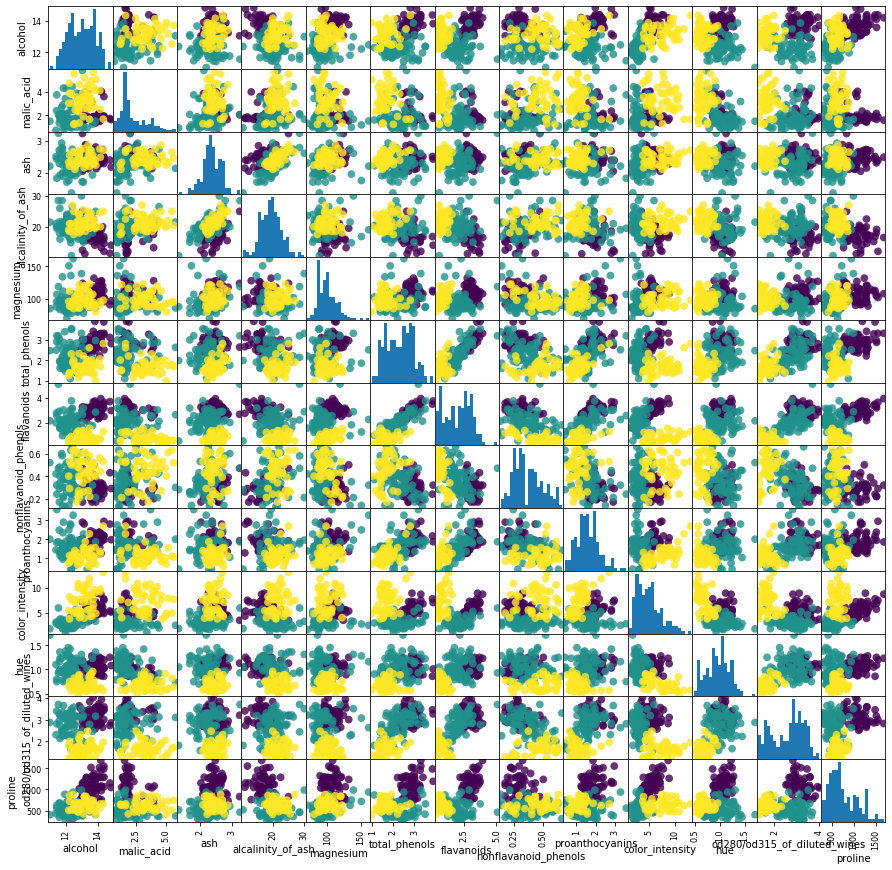

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn import datasets

wine_dataset = datasets.load_wine()
wine_dataframe = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)
grr = pd.plotting.scatter_matrix(wine_dataframe, c=wine_dataset.target, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)

Ei ole üldse arusaadav.
Silma järgi ütlesin, et esimeses on korrelatsioonid suuremad. Võib olla sellepärast, et ma ei saa teisest väga midagi aru.

<a id='kor'></a>

## Korrelatsioonimaatriks

Korrelatsioon, Pearsoni r

$$ r = \frac{\sigma_{xy}}{\sigma_x \sigma_y} = 
       \frac{\sum_{i=1}^n [(x_i - \mu_x)(y_i - \mu_y)]}
       {\sqrt{\sum_{i=1}^n (x_i - \mu_x)^2}{\sqrt{\sum_{i=1}^n (y_i - \mu_y)^2 }}}$$

* $\sigma_{xy}$ on atribuutide $x, y$ kovariatsioon
* $\sigma_x$, $\sigma_y$ on atribuutide $x, y$ standardhälbed
* $\mu_x$, $\mu_y$ on atribuutide $x, y$ keskmised
* $n$ on objektide arv
* $x_i, y_i$ on objekti $i$ atribuutide $x, y$ väärtused.

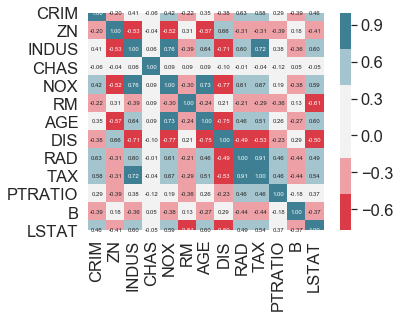

In [8]:
cm = np.corrcoef(X.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 6}, yticklabels=X.columns,
                 xticklabels=X.columns, 
                 cmap=sns.diverging_palette(10, 220, sep=80))
plt.show()

In [9]:
cm

array([[ 1.        , -0.20046922,  0.40658341, -0.05589158,  0.42097171,
        -0.2192467 ,  0.35273425, -0.37967009,  0.62550515,  0.58276431,
         0.28994558, -0.38506394,  0.45562148],
       [-0.20046922,  1.        , -0.53382819, -0.04269672, -0.51660371,
         0.31199059, -0.56953734,  0.66440822, -0.31194783, -0.31456332,
        -0.39167855,  0.17552032, -0.41299457],
       [ 0.40658341, -0.53382819,  1.        ,  0.06293803,  0.76365145,
        -0.39167585,  0.64477851, -0.70802699,  0.59512927,  0.72076018,
         0.38324756, -0.35697654,  0.60379972],
       [-0.05589158, -0.04269672,  0.06293803,  1.        ,  0.09120281,
         0.09125123,  0.08651777, -0.09917578, -0.00736824, -0.03558652,
        -0.12151517,  0.04878848, -0.0539293 ],
       [ 0.42097171, -0.51660371,  0.76365145,  0.09120281,  1.        ,
        -0.30218819,  0.7314701 , -0.76923011,  0.61144056,  0.6680232 ,
         0.18893268, -0.38005064,  0.59087892],
       [-0.2192467 ,  0.311990

*Clustermap* (klasterdamine on tulevase loengu teema) järjestab read ja veerud nõnda ümber, et sarnaste väärtustega ehk lähedased veerud on lähestikku.

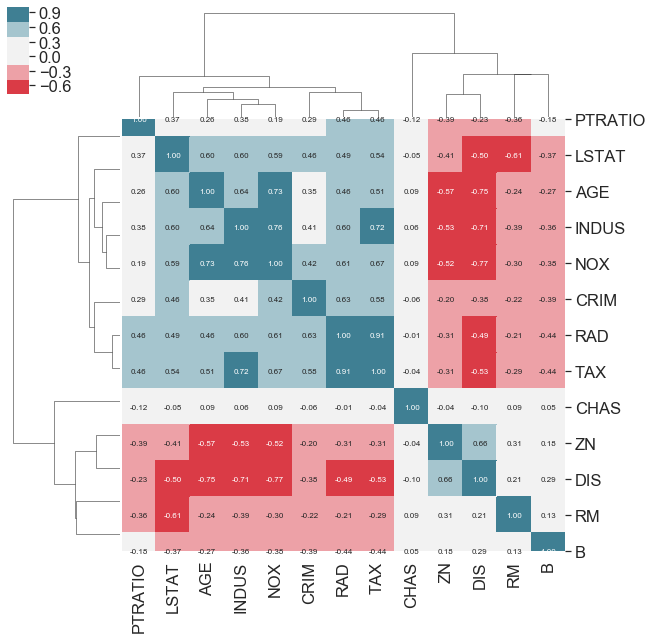

In [10]:
km = sns.clustermap(cm, cbar=True, annot=True,fmt='.2f',
                    annot_kws={'size': 8}, yticklabels=X.columns,
                    xticklabels=X.columns, 
                    cmap=sns.diverging_palette(10, 220, sep=80))
plt.show()

<a id='lin'></a>

## Lineaarregressioon

Lineaarregresiooni eesmärgiks on luua atribuutide $x_i$ abil väärtust $y$ ennustav mudel, st leida kaalud $w_i$ valemile

$$ y = \sum_{i=0}^m w_i x_i $$

Vähimruutude meetod leiab kaalud $w_i$ minimeerides hinnafunktsiooni

$$ J(w) = \sum_{i=1}^n (y_i - \hat{y_i})^2 $$,

kus $n$ on objektide arv, $y_i$ on tegelik väärtus ja $\hat{y_i}$ on ennustatud väärtus.

Scikit-learnis on selleks klass [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

#slr = LinearRegression()
slr = Pipeline([('norm', StandardScaler()), 
                ('lr', LinearRegression())])
slr.fit(X, y)

Pipeline(memory=None,
         steps=[('norm',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [12]:
for col_name, x_i in zip(X.columns, slr.named_steps['lr'].coef_):
    print(col_name + "\t", round(x_i, 4))

CRIM	 -0.9281
ZN	 1.0816
INDUS	 0.1409
CHAS	 0.6817
NOX	 -2.0567
RM	 2.6742
AGE	 0.0195
DIS	 -3.104
RAD	 2.6622
TAX	 -2.0768
PTRATIO	 -2.0606
B	 0.8493
LSTAT	 -3.7436


`LinearRegression.score()` tagastab determinatsioonikordaja $R^2$, mis mõõdab kui suurt osa ennustatava muutuja varieeruvusest regressioonimudel seletab:

 $$R^2  = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y_i})^2}
                   {\sum_{i=1}^n (y_i - \mu_y)^2} $$
                   
Parim võimalik skoor $R^2 = 1.0$ on mudelil siis ja ainult siis kui ennustus on alati täpne st $\hat{y_i} = y_i$ iga $i$ jaoks. Skoor  $R^2 = 0.0$ on mudelil, mis ennustab alati ennustatava muutuja keskmist $\mu_y$,  st $\hat{y_i} = \mu_y$ iga $i$ jaoks ($\sum_{i=1}^n (y_i - \mu_y)^2$ on ennustatava muutuja $y$ dispersioon). Veel halvem mudel võib omada negatiivset skoori.

In [13]:
slr.score(X, y)

0.7406426641094095

<a id='poly'></a>

## Polünomiaalregressioon

Polünomiaalregressiooni mudelis võivad muutujad $x_i$ olla ühest erinevas astmes või omavahel läbi korrutatud.

Ühe muutuja jaoks, kui polünomiaalregressiooni aste on $d$:

$$ y = w_0 + w_1 x + w_2 x^2 + ... + w_dx^d $$

Mitme muutuja korral käiakse läbi ka kõikvõimalikud muutujate kombinatsioonid, nagu näiteks kahe muutuja $x_1, x_2$ ja astme $d=2$ korral:

$$ y = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1^2 + w_4 x_2^2 +
w_5 x_1 x_2 $$

Scikit learnis teisendab andmed sobivale kujule klass
[PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), misjärel tuleb rakendada Lineaarset regressiooni. Sobiv kuju eelmises näites: tekitame atribuudid $1, x_1, x_2, x_1^2, x_2^2, x_1 x_2$.


In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline

iris = load_iris()
Xi = pd.DataFrame(iris.data[:, :3], columns=iris.feature_names[:3])
yi = iris.data[:, 3]
Xi.head()

,sepal length (cm),sepal width (cm),petal length (cm)
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


In [15]:
p_t = PolynomialFeatures(degree=2)
print(Xi.shape)
p_t.fit_transform(Xi).shape

(150, 3)


(150, 10)

Minnes iiriste andmestikus astmeni 2 tekib $x_1, x_2, x_3$ kombinatsioonidest kümme atribuuti:
$1, x_1, x_2, x_3, x_1^2, x_1 x_2, x_1 x_3, x_2^2, x_2 x_3, x_3^2$

In [16]:
print("x_1 aste, x_2 aste, x_3 aste")
print(p_t.powers_)

x_1 aste, x_2 aste, x_3 aste
[[0 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [2 0 0]
 [1 1 0]
 [1 0 1]
 [0 2 0]
 [0 1 1]
 [0 0 2]]


In [17]:
p_t.fit_transform(Xi)[:5]

array([[ 1.  ,  5.1 ,  3.5 ,  1.4 , 26.01, 17.85,  7.14, 12.25,  4.9 ,
         1.96],
       [ 1.  ,  4.9 ,  3.  ,  1.4 , 24.01, 14.7 ,  6.86,  9.  ,  4.2 ,
         1.96],
       [ 1.  ,  4.7 ,  3.2 ,  1.3 , 22.09, 15.04,  6.11, 10.24,  4.16,
         1.69],
       [ 1.  ,  4.6 ,  3.1 ,  1.5 , 21.16, 14.26,  6.9 ,  9.61,  4.65,
         2.25],
       [ 1.  ,  5.  ,  3.6 ,  1.4 , 25.  , 18.  ,  7.  , 12.96,  5.04,
         1.96]])

In [18]:
plr = Pipeline(steps = [('pf', PolynomialFeatures(degree=2)),
                        ('lr', LinearRegression())])
plr.fit(Xi, yi)

Pipeline(memory=None,
         steps=[('pf',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lr',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [19]:
plr.score(Xi, yi)

0.9434446313141588

In [20]:
lr = LinearRegression()
lr.fit(Xi, yi)
lr.score(Xi, yi)

0.9378502736046809

Katsume nüüd ennustada maja mediaanväärtust ühe atribuudi LSTAT alusel.

In [21]:
# Vaatame pairplot-i pealt, milline atribuut on maja mediaanväärtusega
# mittelineaarses seoses

X_LSTAT = X.LSTAT.values.reshape(-1, 1)
plr.fit(X_LSTAT, y)
plr.score(X_LSTAT, y)


0.6407168971636612

In [22]:
lr.fit(X_LSTAT, y)
lr.score(X_LSTAT, y)

0.5441462975864799

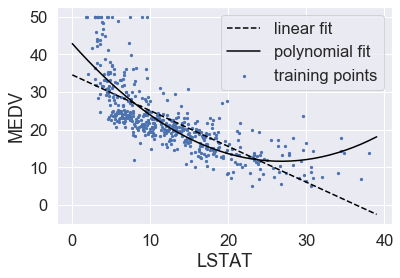

In [23]:
plt.scatter(X_LSTAT, y, label="training points", s=5)
X_fit = np.arange(0, 40, 1).reshape(-1, 1)
y_lin_fit = lr.predict(X_fit)
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--', color='black')
y_pol_fit = plr.predict(X_fit)
plt.plot(X_fit, y_pol_fit, label='polynomial fit', color='black')
plt.legend()
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

<a id='puu'></a>

## Otsustuspuu regressioon

Otsustuspuu ennustuseks objektile on vastavas otsustuspuu lehes olevate treeningandmete keskväärtus. Juhuslikus metsas keskmistatakse ennustused veelkord üle metsa puude.


[DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)


[RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)



In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_LSTAT, y)
print("Tree score: ", tree.score(X_LSTAT, y))

forest = RandomForestRegressor(n_estimators=500, criterion='mse')
forest.fit(X_LSTAT, y)
print("Forest score: ", forest.score(X_LSTAT, y))

Tree score:  0.6993833085636556
Forest score:  0.909410496121112


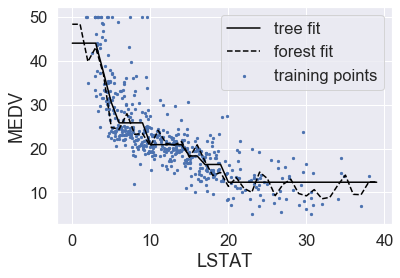

In [25]:
plt.scatter(X_LSTAT, y, label="training points", s=5)
X_fit = np.arange(0, 40, 1).reshape(-1, 1)
y_tree_fit = tree.predict(X_fit)
y_forest_fit = forest.predict(X_fit)
plt.plot(X_fit, y_tree_fit, label='tree fit', color='black')
plt.plot(X_fit, y_forest_fit, label='forest fit', linestyle='--', color='black')
plt.legend()
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

<a id='10_2'></a>

## Ülesanne 10.2

* Joonistage teegi `Seaborn`abil korrelatsioonimaatriksid nii Iiriste kui veinide andmestikele.

* Leidke [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) argumendi `degree` väärtus, mis võimaldab polünomiaalse regressiooni meetodil kõige paremini ennustada ($R^2$ skoori mõttes) Iiriste andmestikus atribuudi *sepal width* väärtust.

* Ennustage veinide andmestikus atribuuti *proline* atribuudi *total_phenols* põhjal. Koostage lineaarse ja polünomiaalse regressiooni mudelid ja kasutaga nii [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) kui ka [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) meetodeid. Leidke nende jaoks $R^2$ skoorid ja joonistage graafikud.



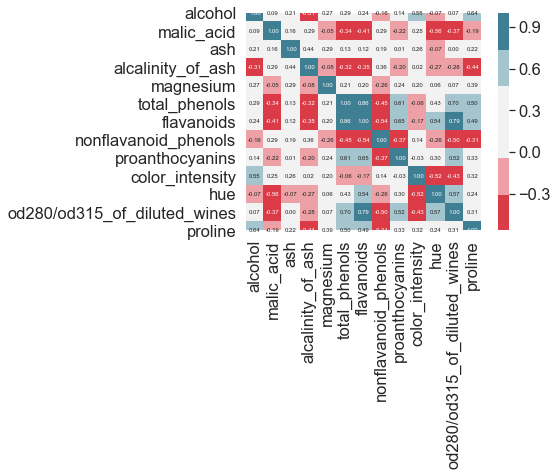

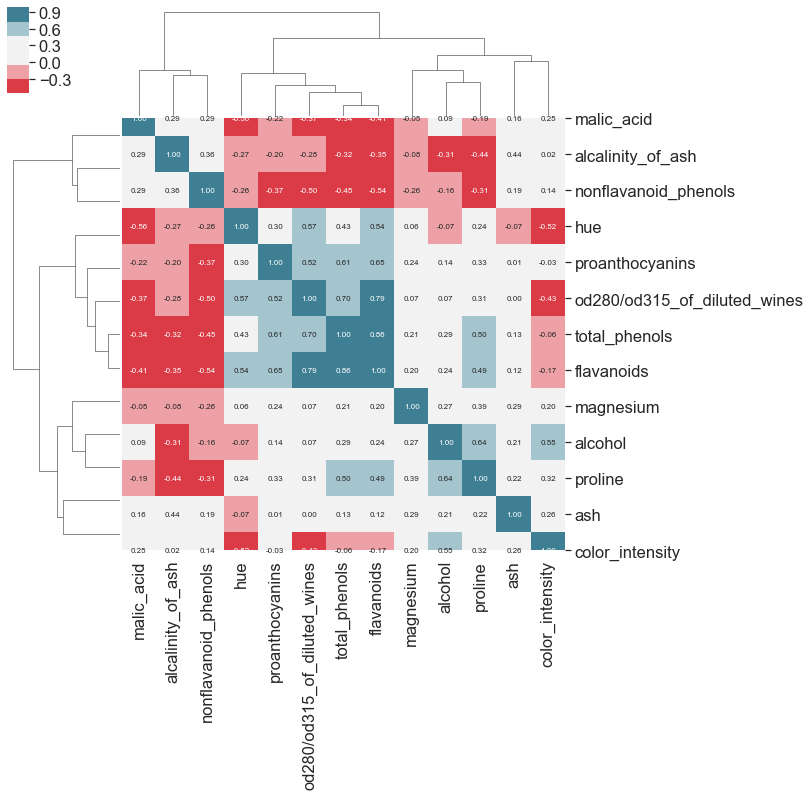

In [26]:
wine_dataset = datasets.load_wine()
X = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)
y = wine_dataset.target

cm = np.corrcoef(X.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 6}, yticklabels=X.columns,
                 xticklabels=X.columns, 
                 cmap=sns.diverging_palette(10, 220, sep=80))
plt.show()

km = sns.clustermap(cm, cbar=True, annot=True,fmt='.2f',
                    annot_kws={'size': 8}, yticklabels=X.columns,
                    xticklabels=X.columns, 
                    cmap=sns.diverging_palette(10, 220, sep=80))
plt.show()

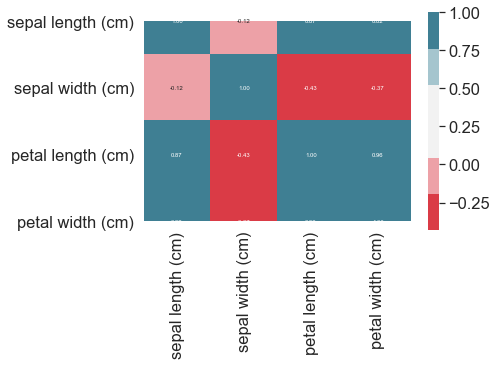

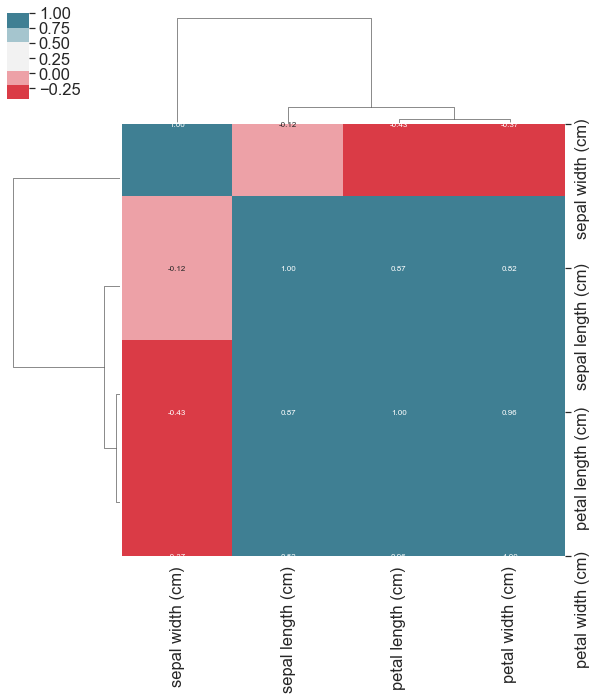

In [27]:
iris_dataset = datasets.load_iris()
X = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
y = iris_dataset.target

cm = np.corrcoef(X.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 6}, yticklabels=X.columns,
                 xticklabels=X.columns, 
                 cmap=sns.diverging_palette(10, 220, sep=80))
plt.show()

km = sns.clustermap(cm, cbar=True, annot=True,fmt='.2f',
                    annot_kws={'size': 8}, yticklabels=X.columns,
                    xticklabels=X.columns, 
                    cmap=sns.diverging_palette(10, 220, sep=80))
plt.show()

In [29]:

iris_df = load_iris()

Xi = pd.DataFrame(iris_df.data, columns=iris_df.feature_names)
yi = Xi.loc[:, 'sepal width (cm)']

Xi = Xi.drop(labels="sepal width (cm)", axis=1)
print(Xi.columns)

stuff = []
best_score = 0
best_depth = 0
for i in range(1, 16):
    p_t = PolynomialFeatures(degree=i)
    p_t.fit_transform(Xi).shape
    p_t.fit_transform(Xi)

    plr = Pipeline(steps = [('pf', PolynomialFeatures(degree=i)),
                            ('lr', LinearRegression())])
    plr.fit(Xi, yi)
    new_score = plr.score(Xi, yi)
    if new_score >= best_score:
        best_score = new_score
        best_depth = i
        print(i, ': ', new_score)
    else:
        print(i, ': ', new_score)

    lr = LinearRegression()
    lr.fit(Xi, yi)

print("best depth is", best_depth)

Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')
1 :  0.5240071007836005
2 :  0.6311034589186761
3 :  0.6617136697017348
4 :  0.6633321670537173
5 :  0.7547909731164706
6 :  0.8486383559176357
7 :  0.9216269673846459
8 :  0.9886153089243622
9 :  0.9915472760176773
10 :  0.9796855370742952
11 :  0.9758210934574155
12 :  0.9566682578718619
13 :  0.96296075382006
14 :  0.9713526187173526
15 :  0.9872715308599388
best depth is 9


In [39]:
wine_df = load_wine()

X_df = pd.DataFrame(wine_df.data, columns=wine_df.feature_names)
y_df = X_df.loc[:, 'proline']
X_df = X_df.loc[:, 'total_phenols'].values.reshape(-1,1)

slr = Pipeline([('norm', StandardScaler()), 
                ('lr', LinearRegression())])
slr.fit(X_df, y_df)
print("slr score: " + str(slr.score(X_df, y_df)))

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_df, y_df)
print("Tree score: ", tree.score(X_df, y_df))

forest = RandomForestRegressor(n_estimators=500, criterion='mse')
forest.fit(X_df, y_df)
print("Forest score: ", forest.score(X_df, y_df))

plr = Pipeline(steps = [('pf', PolynomialFeatures(degree=2)), ('lr', LinearRegression())])
plr.fit(X_df, y_df)
print("Poly score: " + str(plr.score(X_df, y_df)))

lr = LinearRegression()
lr.fit(X_df, y_df)
print("Linear regression score:  " + str(lr.score(X_df, y_df)))


slr score: 0.24811843332086206
Tree score:  0.6118815834820286
Forest score:  0.5974174823384608
Poly score: 0.26625668350397425
Linear regression score:  0.24811843332086206


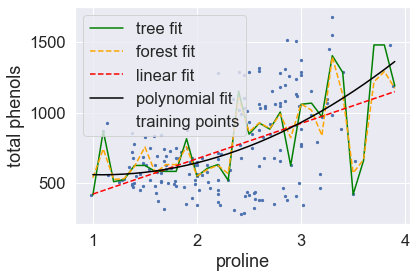

In [43]:
plt.scatter(X_df, y_df, label="training points", s=5)
X_fit_df = np.arange(1, 4, 0.1).reshape(-1, 1)


y_tree_fit = tree.predict(X_fit_df)
y_forest_fit = forest.predict(X_fit_df)
plt.plot(X_fit_df, y_tree_fit, label='tree fit', color='green')
plt.plot(X_fit_df, y_forest_fit, label='forest fit', linestyle='--', color='orange')


y_lin_fit_df = lr.predict(X_fit_df)
plt.plot(X_fit_df, y_lin_fit_df, label='linear fit', linestyle='--', color='red')
y_pol_fit_df = plr.predict(X_fit_df)
plt.plot(X_fit_df, y_pol_fit_df, label='polynomial fit', color='black')
plt.legend()
plt.xlabel('proline')
plt.ylabel('total phenols')

plt.show()